In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def umat_to_mat(obj):
    return cv2.UMat.get(obj)

In [3]:
img1 = cv2.imread('train_image/train_1.jpg')  
img2 = cv2.imread('train_image/train_2.jpg') 

In [4]:
print(f'shape of image 1: {img1.shape}')
print(f'shape of image 2: {img2.shape}')

shape of image 1: (2848, 4288, 3)
shape of image 2: (3008, 2000, 3)


In [5]:
# turn on GPU
img1 = cv2.UMat(img1)
img2 = cv2.UMat(img2)

In [6]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

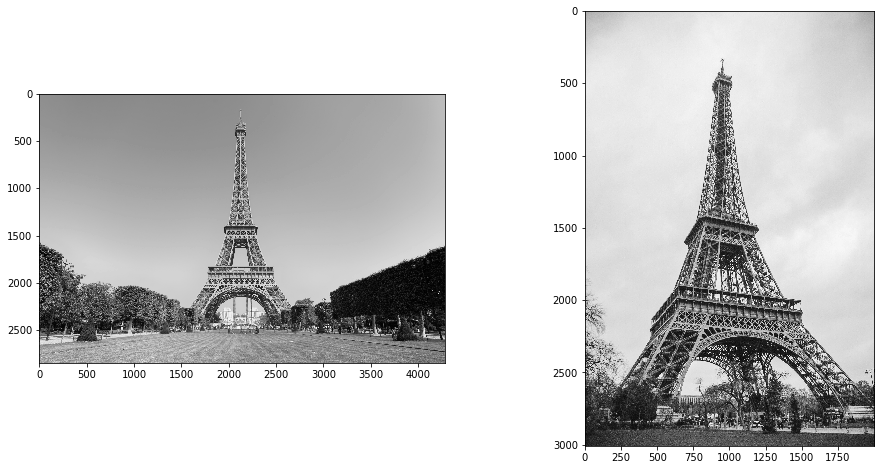

In [7]:
figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(cv2.UMat.get(gray1), cmap='gray')
ax[1].imshow(cv2.UMat.get(gray2), cmap='gray')

# SWIFT

In [8]:
sift = cv2.xfeatures2d.SIFT_create()

In [9]:
keypoints_1, descriptors_1 = sift.detectAndCompute(gray1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(gray2,None)

### Keypoints shape

In [10]:
print(len(keypoints_1), len(keypoints_2))

71752 41380


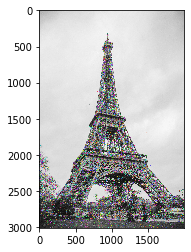

In [11]:
img_1 = cv2.drawKeypoints(umat_to_mat(gray2),keypoints_2,umat_to_mat(img1))
plt.imshow(img_1)

In [14]:
cv2.imwrite( 'name.jpg',img_1)

True

## Feature matching

https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html - matches

In [15]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

In [16]:
matches = bf.knnMatch(descriptors_1, descriptors_2, k=2)

In [17]:
np.array(matches)[:,1].shape[0]

71752

# distance
In this part we apply the ratio test to select only the good matches.
The quality of a match is define by the distance. The distance is a number, and the lower this number is, the more similar the features are.
By applying the ratio test we can decide to take only the matches with lower distance, so higher quality.

If you decrease the ratio value, for example to 0.1 you will get really high quality matches, but the downside is that you will get only few matches.
If you increase it you will get more matches but sometimes many false ones.

source - https://pysource.com/2018/07/20/find-similarities-between-two-images-with-opencv-and-python/

In [18]:
good_matches = []
ratio = 0.6
for m, n in matches:
    if m.distance < ratio * n.distance:
        good_matches.append(m)

In [19]:
len(good_matches)

28

In [20]:
img_matches = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, good_matches, None)

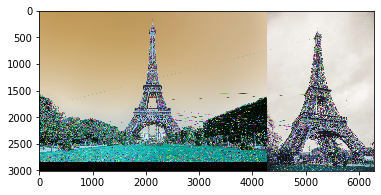

In [21]:
plt.imshow(cv2.UMat.get(img_matches))

In [22]:
cv2.imwrite('compared.jpg',img_matches)

True

# Localization

https://docs.opencv.org/3.4/d7/dff/tutorial_feature_homography.html - Localization

In [25]:
#-- Localize the object
obj = np.empty((len(good_matches),2), dtype=np.float32)
scene = np.empty((len(good_matches),2), dtype=np.float32)

for i in range(len(good_matches)):
    #-- Get the keypoints from the good matches
    obj[i,0] = keypoints_1[good_matches[i].queryIdx].pt[0]
    obj[i,1] = keypoints_1[good_matches[i].queryIdx].pt[1]
    scene[i,0] = keypoints_2[good_matches[i].trainIdx].pt[0]
    scene[i,1] = keypoints_2[good_matches[i].trainIdx].pt[1]

In [28]:
v

In [29]:
H

array([[ 1.42366449e+00,  3.00843724e-02, -2.02702985e+03],
       [ 6.63771262e-01,  6.34648849e-01, -5.79333159e+02],
       [ 2.44989139e-04, -2.78055923e-04,  1.00000000e+00]])

In [30]:
np.linalg.norm(H)

2108.19372340798

In [32]:
localization_error = np.array([abs(m.distance - n.distance) for m, n in matches])

In [33]:
localization_error.mean()

14.039985614844237

# Train

In [45]:
import os
from json import dump

In [35]:
path = os.path.abspath(os.getcwd())

In [36]:
path

'/home/eduard/gitRepo/object_recognition/Lab2'

In [38]:
f'{path}/train_image/train_{1}'

'/home/eduard/gitRepo/object_recognition/Lab2/train_image/train_1'

In [43]:
image_kernel_path = f'{path}/train_image/train_{2}.jpg'
img_kernel = cv2.imread(image_kernel_path)  

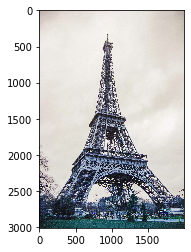

In [44]:
plt.imshow(img_kernel)